# Data Preparatration and Customer Analytics

Conduct analysis on our client's transaction dataset and identify customer puchasinf behavious to genrate insights and provide commercial recommendations.

##### Brief Summary:
You are tasked with analyzing the purchasing behavior of customers who buy chips within a specific region. This analysis will assist in shaping the supermarket's strategic plan for the chip category over the next six months. Your manager, Zilinka, outlined key tasks, including examining and cleaning transaction and customer data, analyzing customer segments, and making recommendations based on insights.

#### Key Tasks:

#### Examine Transaction Data:

- Check for inconsistencies, missing data, outliers, and correctly identified categories.
- Ensure numeric data is accurate across all tables.
- Clean the data and save the updated dataset.
  
#### Examine Customer Data:
- Look for similar issues in the customer data (e.g., nulls).
- Once satisfied with the data, merge transaction and customer datasets.
- Save progress throughout.
  
#### Data Analysis & Customer Segments:
- Define key metrics (total sales, sales drivers, etc.).
- Identify areas with the highest sales and analyze trends.
- Create visualizations (charts and graphs) to present findings.
- 
#### Deep Dive into Customer Segments:
- Provide recommendations based on insights from the analysis.
- Identify target customer segments.
- Consider the importance of packet sizes.
- Form a comprehensive conclusion from the analysis.
  
#### Deliverables:
- Save your analysis in CSV format.
- Save all visualizations for the final report.
- Share initial findings by the end of next week.
  
#### End Goal:
Provide insights and recommendations for the Chips category report to Julia.

##### Importing required libraries

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_ind
from mlxtend.frequent_patterns import apriori, association_rules

import warnings
warnings.filterwarnings('ignore')

##### Importing the Dataset

In [9]:
# p_data = Purchasing behaviour data 
p_data = pd.read_csv("W:\Datasets\QVI_purchase_behaviour.csv")
p_data

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


D-Tale is a Python library that provides a graphical interface for data exploration and analysis. It allows users to interact with their data in a more intuitive and visual way, making it easier to understand and manipulate datasets. D-Tale is particularly useful for data scientists and analysts who work with pandas DataFrames, as it integrates seamlessly with them.

In [11]:
import dtale
df1 = dtale.show(p_data)
df1

Out data consist of 72637 rows and 3 columns

In [13]:
# t_data = Transactional data
t_data = pd.read_excel("W:\Datasets\QVI_transaction_data.xlsx")
t_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [14]:
import dtale
df2 = dtale.show(t_data)
df2

Our transactional data consists of 264836 rows and 8 coulmns

Using dtale helps me futher gain insights quickly without spending much time on analysing each and every aspect of the data and focus on whats important for the task ahead 

## Data Exploration 

In [17]:
# Info from the Purchasing behaviour dataset 

p_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [18]:
# Info from the Transactional dataset 

t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [19]:
# Checking for null values in Puschasing behaviour dataset

p_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [20]:
# Checking for null values in Transactional datset

t_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

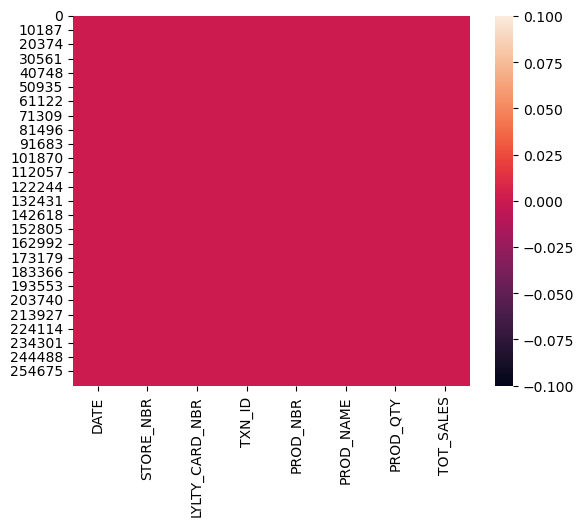

In [21]:
sns.heatmap(t_data.isnull())
plt.show()

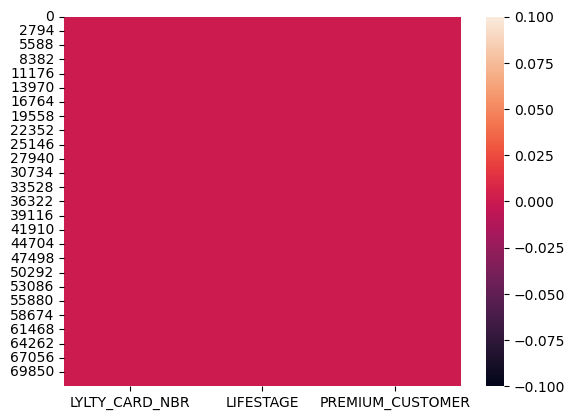

In [22]:
sns.heatmap(p_data.isnull())
plt.show()

As we can see there are no null values present in both the dataset provided. 
Next step is where we check for outliers in data but before that we need to merge both the datasets for further analysis.

In [24]:
p_data.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [25]:
t_data.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [26]:
# Merging both datasets
# m_data = Merged dataset made by merging both Purchasing and transactional data

m_data = pd.merge(p_data, t_data, on = 'LYLTY_CARD_NBR', how = 'right')
m_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1307,MIDAGE SINGLES/COUPLES,Budget,43599,1,348,66,CCs Nacho Cheese 175g,3,6.3
2,1343,MIDAGE SINGLES/COUPLES,Budget,43605,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2373,MIDAGE SINGLES/COUPLES,Budget,43329,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2426,MIDAGE SINGLES/COUPLES,Budget,43330,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [235]:
df3 = dtale.show(m_data)
df3

Now we have out merged dataset to further analyze the data 

In [29]:
m_data.shape

(264836, 10)

In [30]:
m_data.describe()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,2.648360e+05,264836.000000,264836.00000,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,1.355495e+05,43464.036260,135.08011,1.351583e+05,56.583157,1.907309,7.304200
std,8.057998e+04,105.389282,76.78418,7.813303e+04,32.826638,0.643654,3.083226
min,1.000000e+03,43282.000000,1.00000,1.000000e+00,1.000000,1.000000,1.500000
25%,7.002100e+04,43373.000000,70.00000,6.760150e+04,28.000000,2.000000,5.400000
50%,1.303575e+05,43464.000000,130.00000,1.351375e+05,56.000000,2.000000,7.400000
75%,2.030942e+05,43555.000000,203.00000,2.027012e+05,85.000000,2.000000,9.200000
max,2.373711e+06,43646.000000,272.00000,2.415841e+06,114.000000,200.000000,650.000000


In [31]:
#Info from merged dataset
m_data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264836 non-null  int64  
 1   LIFESTAGE         264836 non-null  object 
 2   PREMIUM_CUSTOMER  264836 non-null  object 
 3   DATE              264836 non-null  int64  
 4   STORE_NBR         264836 non-null  int64  
 5   TXN_ID            264836 non-null  int64  
 6   PROD_NBR          264836 non-null  int64  
 7   PROD_NAME         264836 non-null  object 
 8   PROD_QTY          264836 non-null  int64  
 9   TOT_SALES         264836 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB


As we can see the date column is not in proper format, so date column needs to be changed into Date format first

In [33]:
from datetime import date, timedelta

start = date(1899,12,30)
date_format = []
for date in m_data["DATE"]:
    delta = timedelta(date)
    date_format.append(start + delta)

In [34]:
m_data["DATE"] = pd.to_datetime(pd.Series(date_format))
print(m_data["DATE"].dtype)

datetime64[ns]


In [35]:
m_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1307,MIDAGE SINGLES/COUPLES,Budget,2019-05-14,1,348,66,CCs Nacho Cheese 175g,3,6.3
2,1343,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2373,MIDAGE SINGLES/COUPLES,Budget,2018-08-17,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2426,MIDAGE SINGLES/COUPLES,Budget,2018-08-18,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Now our data and all the columns are in proper format. further we will analyze the product name column to make sure all the products listed are chips

In [37]:
m_data['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [38]:
split_prods = (
    m_data["PROD_NAME"]
    .str.replace(r'(\d+[gG])', '', regex=True)  # Remove digits followed by 'g' or 'G'
    .str.replace(r'[^\w]', ' ', regex=True)    # Replace non-word characters with spaces
    .str.split()                                # Split into lists of words
)


In [39]:
word_count = {}
def count_word(line):
    for word in line:
        if word not in word_count:
            word_count[word] = 1
        else:
            word_count[word] += 1
split_prods.apply(lambda line: count_word(line))
print(pd.Series(word_count).sort_values(ascending =False))

Chips       49770
Kettle      41288
Smiths      28860
Salt        27976
Cheese      27890
            ...  
Sunbites     1432
Pc           1431
Garden       1419
NCC          1419
Fries        1418
Length: 198, dtype: int64


In [40]:
m_data["PROD_QTY"].value_counts(bins = 4). sort_index()

(0.8, 50.75]       264834
(50.75, 100.5]          0
(100.5, 150.25]         0
(150.25, 200.0]         2
Name: count, dtype: int64

- As we analyze the dataset we can see that "PROD_QYT" value is above 50.75

In [42]:
m_data.sort_values(by = 'PROD_QTY', ascending = False).head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
217237,201060,YOUNG FAMILIES,Premium,2019-05-18,201,200202,26,Pringles Sweet&Spcy BBQ 134g,5,18.5
238333,219004,YOUNG SINGLES/COUPLES,Mainstream,2018-08-14,219,218018,25,Pringles SourCream Onion 134g,5,18.5
238471,261331,YOUNG SINGLES/COUPLES,Mainstream,2019-05-19,261,261111,87,Infuzions BBQ Rib Prawn Crackers 110g,5,19.0


In [43]:
m_data = m_data[m_data["PROD_QTY"] < 6]

In [44]:
len(m_data[m_data["LYLTY_CARD_NBR"]==226000])

0

In [45]:
m_data["DATE"].nunique()

364

In [46]:
stats = m_data["DATE"].describe()

# Calculate statistics for the 'DATE' column
count = m_data['DATE'].count()  # Total non-null entries
unique = m_data['DATE'].nunique()  # Number of unique values
top = m_data['DATE'].mode().iloc[0]  # Most frequent value (mode)
freq = m_data['DATE'].value_counts().iloc[0]  # Frequency of the most frequent value
first = m_data['DATE'].iloc[0]  # First value in the column
last = m_data['DATE'].iloc[-1]  # Last value in the column

# Print the results
print(f"Count: {count}")
print(f"Unique: {unique}")
print(f"Top: {top}")
print(f"Frequency: {freq}")
print(f"First: {first}")
print(f"Last: {last}")

Count: 264834
Unique: 364
Top: 2018-12-24 00:00:00
Frequency: 939
First: 2018-10-17 00:00:00
Last: 2018-09-22 00:00:00


- There are 365 days in a year but in the date column of our dataset there are 364 unique values so one day is missing from our data set 

In [48]:
pd.date_range(start = m_data['DATE'].min(),
              end = m_data['DATE'].max()).difference(m_data['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

- By applying the difference method we are able to see that [ 2018 - 12 - 25 ] was the missing date from our dataset

In [50]:
check_null_date = pd.merge(
    pd.Series(
        pd.date_range(start=m_data['DATE'].min(), end=m_data['DATE'].max()),
        name='DATE'
    ),
    m_data,
    on='DATE',
    how='left'
)

# 

- The goal of this code is to identify missing dates in the DATE column of the m_data DataFrame. By creating a complete date range and performing a left join, the resulting DataFrame (check_null_date) will:

- Include all dates in the range.

- Show NaN values for rows where dates are missing in the original dataset.

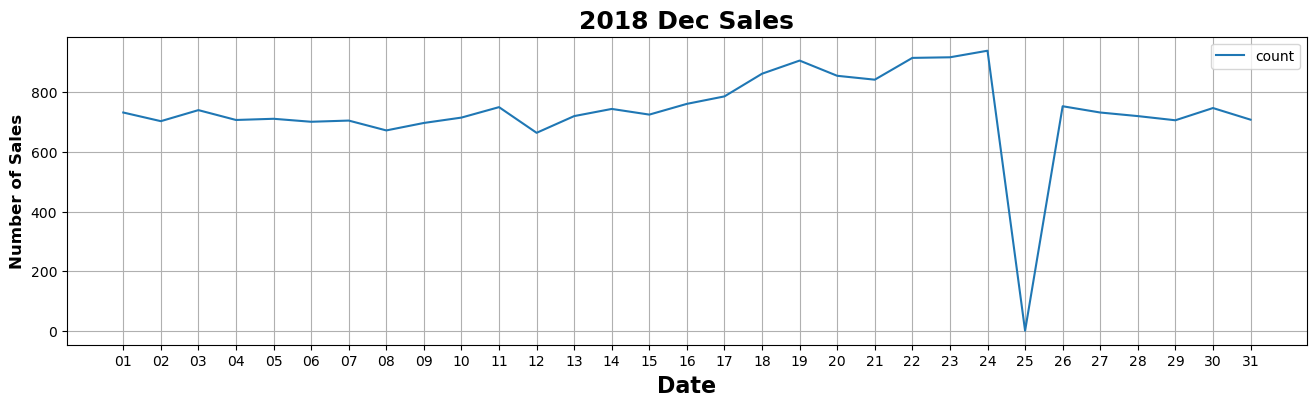

In [52]:
# Graphical representation of missing date

#count the occurence of each date
t_by_date = check_null_date['DATE'].value_counts()

#Filtering the date for december 2018
dec = t_by_date[(t_by_date.index >= pd.Timestamp(2018, 12, 1)) & 
                    (t_by_date.index < pd.Timestamp(2019, 1, 1))].sort_index()

# Formatting the index to dates to display only the say 
dec.index = dec.index.strftime('%d')

# plotting sales for december 2018
plt.figure(figsize = (16,4))
ax = dec.plot()

# Set x-axis ticks and labels
ax.set_xticks(np.arange(len(dec)))
ax.set_xticklabels(dec.index)

# Set the plot title and saving the figure
plt.title("2018 Dec Sales", fontsize = 18, fontweight = 'bold', color = 'black')
plt.xlabel("Date", fontsize = 16, fontweight = 'bold', color = 'black')
plt.savefig("2018 Dec Sales.png", bbox_inches = "tight")
plt.ylabel("Number of Sales", fontsize=12, fontweight='bold', color='black')
plt.grid()
plt.legend()
plt.show()

In [53]:
check_null_date["DATE"].value_counts().sort_values()

DATE
2018-12-25      1
2018-11-25    648
2018-10-18    658
2019-06-13    659
2019-06-24    662
             ... 
2018-12-18    862
2018-12-19    906
2018-12-22    915
2018-12-23    917
2018-12-24    939
Name: count, Length: 365, dtype: int64

- From the data we can see that 25 december has no transaction, 25 december is christmas and the shops are closed hence there is no record of transactions that day, so there is no anomaly in the data.

## Exploring Packet Sizes

In [56]:
# Replace the numeric part followed by 'G' in 'PROD_NAME' with 'g'
m_data["PROD_NAME"] = m_data["PROD_NAME"].str.replace(r'[0-9]+G', 'g', regex=True)

# Extract the packet sizes (numbers followed by 'G') from 'PROD_NAME' and convert them to float
packet_sizes = m_data["PROD_NAME"].str.extract(r'([0-9]+)g')[0].astype(float)

# Display packet sizes
packet_sizes


0         175.0
1         175.0
2         170.0
3         175.0
4         150.0
          ...  
264831    175.0
264832    175.0
264833    170.0
264834    150.0
264835    175.0
Name: 0, Length: 264834, dtype: float64

In [57]:
packet_sizes.describe()

count    258770.000000
mean        182.324276
std          64.955035
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: 0, dtype: float64

In [58]:
packet_sizes.value_counts()

0
175.0    64929
150.0    41633
134.0    25102
110.0    22387
170.0    19983
165.0    15297
300.0    15166
330.0    12540
380.0     6416
270.0     6285
200.0     4473
135.0     3257
250.0     3169
210.0     3167
90.0      3008
190.0     2995
160.0     2970
220.0     1564
70.0      1507
180.0     1468
125.0     1454
Name: count, dtype: int64

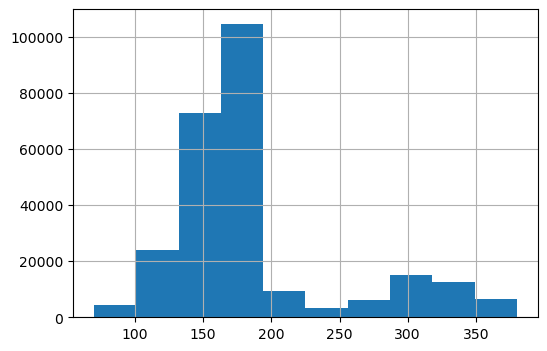

In [59]:
plt.figure(figsize = (6,4))
ax = packet_sizes.hist()

plt.show()

In [60]:
m_data["PROD_NAME"].str.split().str[0].value_counts().sort_index()

PROD_NAME
Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       24962
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Old            9324
Pringles      25102
RRD           11894
Red            5885
Smith          2963
Smiths        28860
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     4437
Name: count, dtype: int64

- Products names in the dataset are written in more than one way eg: Dorito and Doritos, Grains and GrnWv
es, Infusions and Ifzns, Natural and NCC, Red and RRD, Smith and Smiths and Snbts and Sunbites.

To clean the brand names we can either write a python code using conditional statements to clean and sort the values or you can apply text processing techniques like string matching, fuzzy matching, or custom rules to handle abbreviations and inconsistencies. one effective method is we can use python libraries like Rapizfuzz which allows you to match similar strings based on a similarity score.

In [91]:
from rapidfuzz import fuzz, process

# List of unique product names
prod_names = m_data["PROD_NAME"].str.split().str[0].value_counts().index.tolist()

# Define a threshold for similarity (e.g., 80% or higher)
threshold = 80

# Create an empty dictionary to store grouped names
grouped_names = {}

for name in prod_names:
    # Find the closest match in grouped names
    match = process.extractOne(name, grouped_names.keys(), scorer=fuzz.ratio, score_cutoff=threshold)
    
    if match:
        # Extract the name (first element of the tuple) from the match result
        closest_name = match[0]
        # Append the current name to the closest matching group
        grouped_names[closest_name].append(name)
    else:
        # If no similar name is found, create a new group for the current name
        grouped_names[name] = [name]

# Display the grouped names
for group, names in grouped_names.items():
    print(f"{group}: {names}")


Kettle: ['Kettle']
Smiths: ['Smiths', 'Smith']
Pringles: ['Pringles']
Doritos: ['Doritos', 'Dorito']
Thins: ['Thins']
RRD: ['RRD']
Infuzions: ['Infuzions', 'Infzns']
WW: ['WW']
Cobs: ['Cobs']
Tostitos: ['Tostitos']
Twisties: ['Twisties']
Old: ['Old']
Tyrrells: ['Tyrrells']
Grain: ['Grain']
Natural: ['Natural']
Red: ['Red']
Cheezels: ['Cheezels']
CCs: ['CCs']
Woolworths: ['Woolworths']
Cheetos: ['Cheetos']
Snbts: ['Snbts']
Burger: ['Burger']
GrnWves: ['GrnWves']
Sunbites: ['Sunbites']
NCC: ['NCC']
French: ['French']


In [93]:
# Apply clean_brand_names on the entire "PROD_NAME" column
prod_names = m_data["PROD_NAME"].str.split().str[0].value_counts().index.tolist()

In [95]:
# Map the original product names to the cleaned group names
def map_to_cleaned_name(prod_name):
    for group, names in grouped_names.items():
        if prod_name in names:
            return group
    return prod_name  # If no match is found, return the original name

In [97]:
# Apply the mapping to create a new "clean_brand_names" column
m_data["clean_brand_names"] = m_data["PROD_NAME"].str.split().str[0].apply(map_to_cleaned_name)

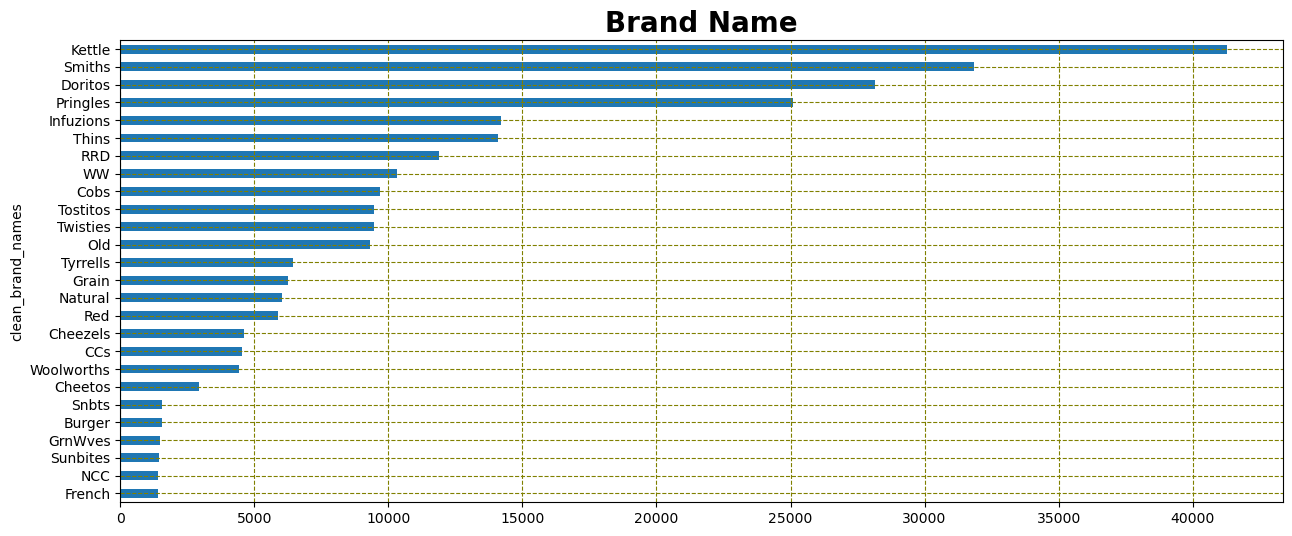

In [99]:
# Plot the cleaned brand name counts
m_data["clean_brand_names"].value_counts(ascending=True).plot.barh(figsize=(15, 6))
plt.title("Brand Name", fontsize=20, fontweight='bold', color='black')
plt.grid(color='olive', linestyle='--')
plt.savefig("Brand Names.png", bbox_inches="tight")
plt.show()

In [101]:
m_data.isnull().sum()

LYLTY_CARD_NBR       0
LIFESTAGE            0
PREMIUM_CUSTOMER     0
DATE                 0
STORE_NBR            0
TXN_ID               0
PROD_NBR             0
PROD_NAME            0
PROD_QTY             0
TOT_SALES            0
clean_brand_names    0
dtype: int64

### Questions to be answered from the data: 
- Which customer group, categorized by lifestage and their overall purchasing behavior (premium vs. non-premium), contributes the highest total expenditure on chips?
- What is the total number of customers in each segment?
- On average, how many chips does a customer purchase in each segment?
- What is the average price of chips purchased by customers in each segment?

In [104]:
m_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,clean_brand_names
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural
1,1307,MIDAGE SINGLES/COUPLES,Budget,2019-05-14,1,348,66,CCs Nacho Cheese 175g,3,6.3,CCs
2,1343,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths
3,2373,MIDAGE SINGLES/COUPLES,Budget,2018-08-17,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths
4,2426,MIDAGE SINGLES/COUPLES,Budget,2018-08-18,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle


In [106]:
g_sales = pd.DataFrame(m_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])['TOT_SALES'].agg(['sum', 'mean']))
g_sales.sort_values(ascending = False, by='sum')

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
OLDER FAMILIES         Budget            168363.25  7.269570
YOUNG SINGLES/COUPLES  Mainstream        157621.60  7.558339
RETIREES               Mainstream        155677.05  7.252262
YOUNG FAMILIES         Budget            139345.85  7.287201
OLDER SINGLES/COUPLES  Budget            136769.80  7.430315
                       Mainstream        133393.80  7.282116
                       Premium           132263.15  7.449766
RETIREES               Budget            113147.80  7.443445
OLDER FAMILIES         Mainstream        103445.55  7.262395
RETIREES               Premium            97646.05  7.456174
YOUNG FAMILIES         Mainstream         92788.75  7.189025
MIDAGE SINGLES/COUPLES Mainstream         90803.85  7.647284
YOUNG FAMILIES         Premium            84025.50  7.266756
OLDER FAMILIES         Premium            80658.40  7.208079
YOUNG SINGLES/COUPLES  Budget             61141.60  6.615624
MIDAGE SINGLES/COUPLES Premium            58432.65  7.112056
YOUNG SINGLES/COUPLES  Premium            41642.10  6.629852
MIDAGE SINGLES/COUPLES Budget             35514.80  7.074661
NEW FAMILIES           Budget             21928.45  7.297321
                       Mainstream         17013.90  7.317806
                       Premium            11491.10  7.231655

In [108]:
g_sales['sum'].sum()

1933115.0000000002

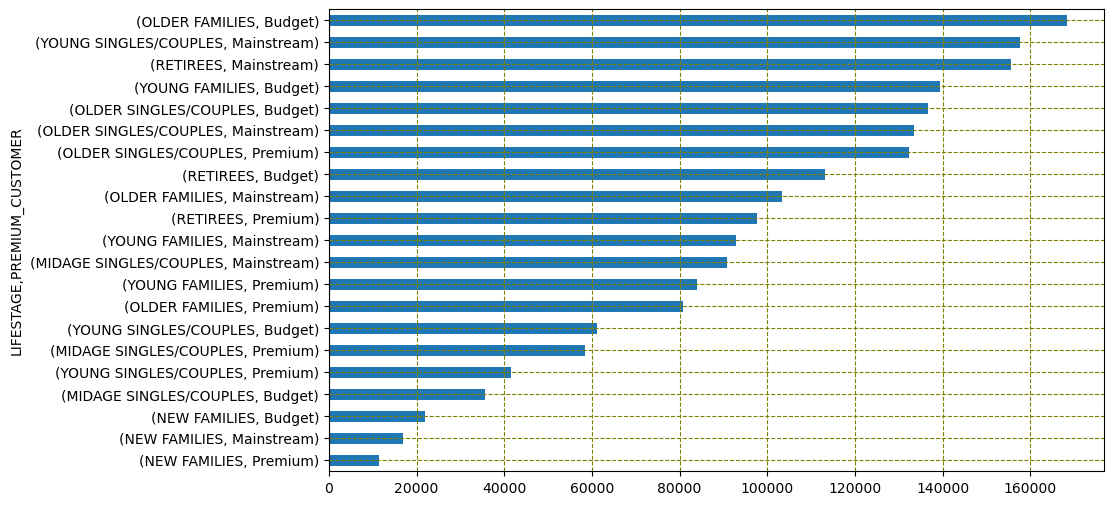

In [110]:
fig, ax = plt.subplots(figsize=(10, 6))

g_sales["sum"].sort_values().plot(kind='barh', ax=ax)
ax.grid(True, which='both', axis='both', color='olive', linestyle='--')

plt.show()


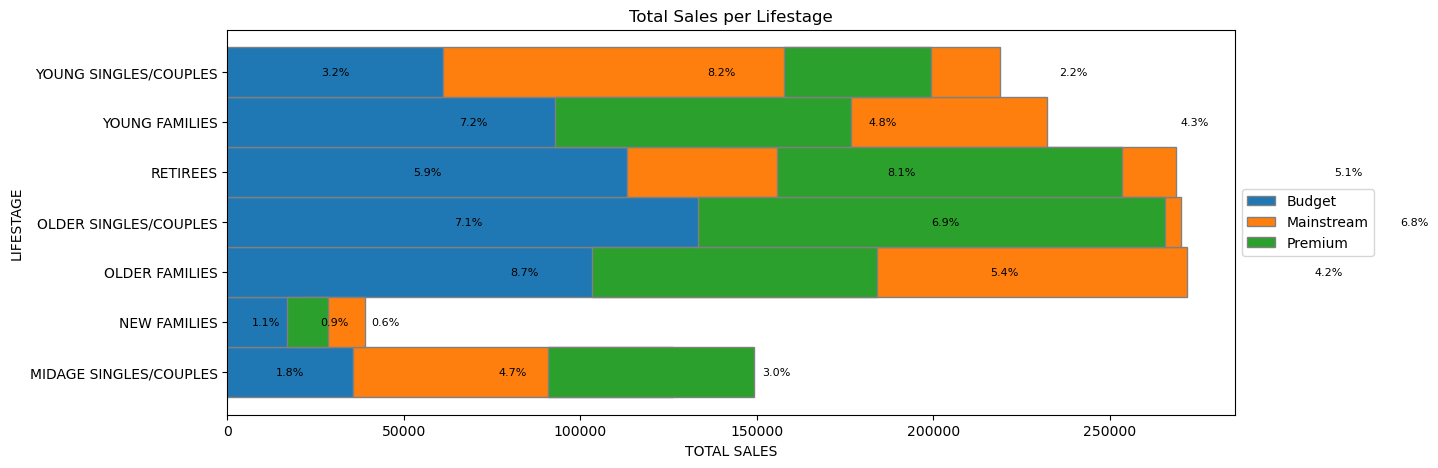

In [112]:
# Values of each group
bars1 = g_sales[g_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]["sum"]
bars2 = g_sales[g_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]["sum"]
bars3 = g_sales[g_sales.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]["sum"]
 
bars1_text = (bars1 / sum(g_sales["sum"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(g_sales["sum"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(g_sales["sum"])).apply("{:.1%}".format)
 
# Names of group and bar width
names = g_sales.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(13,5)) 

# Create brown bars
budget_bar = plt.barh(r, bars1, edgecolor='grey', height=1, label="Budget")
# Create green bars (middle), on top of the firs ones
mains_bar = plt.barh(r, bars2, left=bars1, edgecolor='grey', height=1, label="Mainstream")
# Create green bars (top)
tmp_bar = np.add(bars1, bars2)
prem_bar = plt.barh(r, bars3, left=bars2, edgecolor='grey', height=1, label="Premium")

for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=8)
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=8)
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=8)
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("LIFESTAGE")
plt.xlabel("TOTAL SALES")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.title("Total Sales per Lifestage")

plt.savefig("lifestage_sales.png", bbox_inches="tight")

# Show graphic
plt.show()

In [114]:
stage_agg_premium = m_data.groupby("LIFESTAGE")["PREMIUM_CUSTOMER"].agg(pd.Series.mode).sort_values()
print("\n ---- Top contributer per Lifestage by Premium category ---- \n")
print(stage_agg_premium)


 ---- Top contributer per Lifestage by Premium category ---- 

LIFESTAGE
NEW FAMILIES                  Budget
OLDER FAMILIES                Budget
OLDER SINGLES/COUPLES         Budget
YOUNG FAMILIES                Budget
MIDAGE SINGLES/COUPLES    Mainstream
RETIREES                  Mainstream
YOUNG SINGLES/COUPLES     Mainstream
Name: PREMIUM_CUSTOMER, dtype: object


In [116]:
# Group by 'LIFESTAGE' and 'PREMIUM_CUSTOMER' and sum the 'TOT_SALES'
total_sales_by_segment = m_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Sort the segments by total sales in descending order
total_sales_by_segment_sorted = total_sales_by_segment.sort_values(by='TOT_SALES', ascending=False)

# Get the top 3 segments
top_3_segments = total_sales_by_segment_sorted.head(3)

# Print the top 3 segments
print(top_3_segments)

                LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
6          OLDER FAMILIES           Budget  168363.25
19  YOUNG SINGLES/COUPLES       Mainstream  157621.60
13               RETIREES       Mainstream  155677.05


#### The TOP 3 sales contributor segments are:

-  Older Families (Budget) - $168,364.
  
-  Young Singles- Couples (Mainstream) - $157,622.

  
-  Retirees (Mainstream) - $155,667.

In [119]:
unique_customer = (
    m_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"]
    .nunique()
    .sort_values(ascending = False)
)

unique_customer_data = unique_customer.reset_index(name = "unique_customers")

print(unique_customer_data)

                 LIFESTAGE PREMIUM_CUSTOMER  unique_customers
0    YOUNG SINGLES/COUPLES       Mainstream              8088
1                 RETIREES       Mainstream              6479
2    OLDER SINGLES/COUPLES       Mainstream              4930
3    OLDER SINGLES/COUPLES           Budget              4929
4    OLDER SINGLES/COUPLES          Premium              4750
5           OLDER FAMILIES           Budget              4675
6                 RETIREES           Budget              4454
7           YOUNG FAMILIES           Budget              4017
8                 RETIREES          Premium              3872
9    YOUNG SINGLES/COUPLES           Budget              3779
10  MIDAGE SINGLES/COUPLES       Mainstream              3340
11          OLDER FAMILIES       Mainstream              2831
12          YOUNG FAMILIES       Mainstream              2728
13   YOUNG SINGLES/COUPLES          Premium              2574
14          YOUNG FAMILIES          Premium              2433
15  MIDA

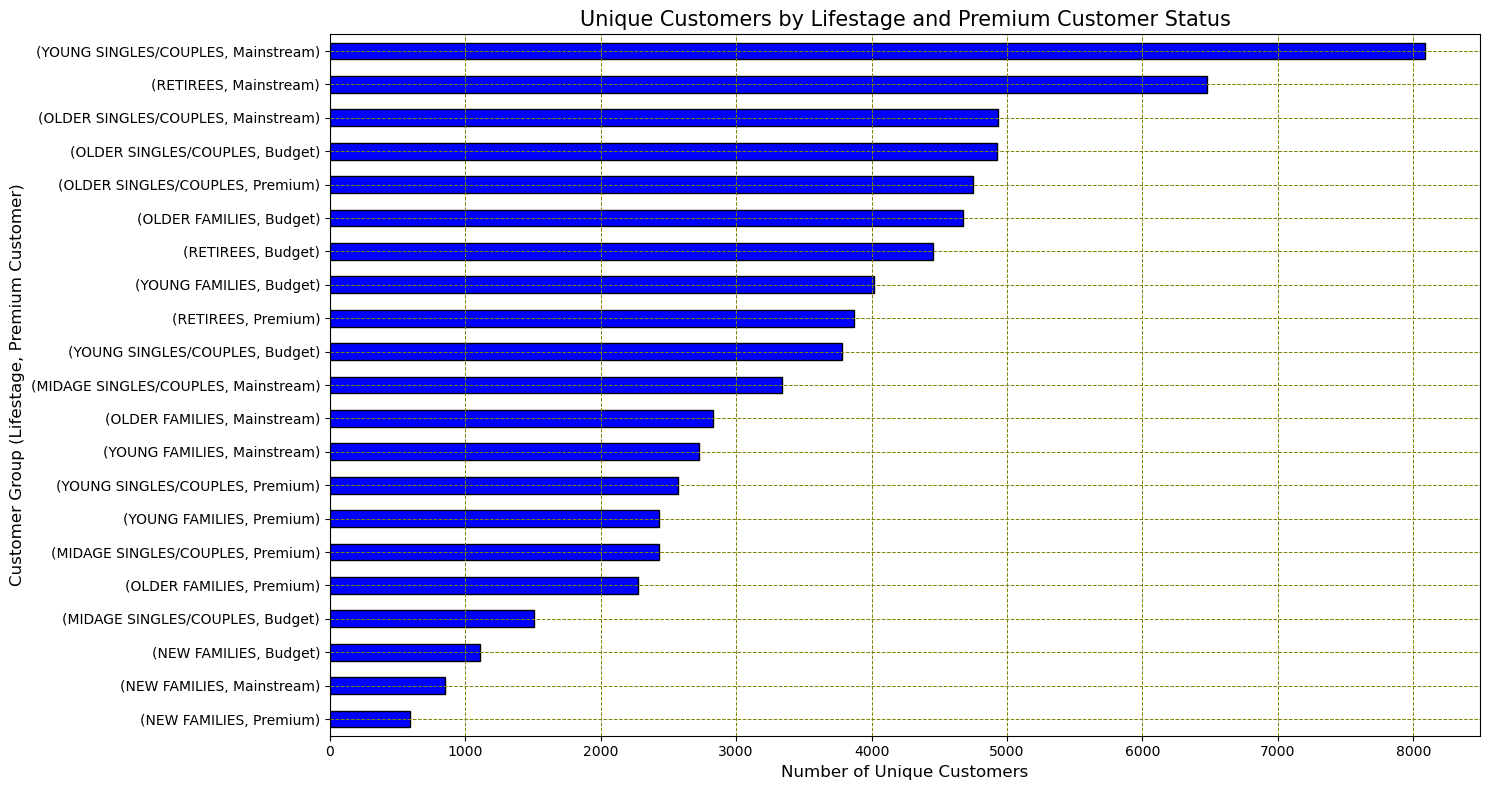

In [121]:
unique_customer.sort_values(ascending=True).plot.barh(
    figsize=(15, 8), 
    color='blue',
    edgecolor='black'  
)

plt.grid(color='olive', linestyle='--', linewidth=0.7)

plt.xlabel('Number of Unique Customers', fontsize=12)
plt.ylabel('Customer Group (Lifestage, Premium Customer)', fontsize=12)
plt.title('Unique Customers by Lifestage and Premium Customer Status', fontsize=15)
plt.tight_layout() 
plt.show()


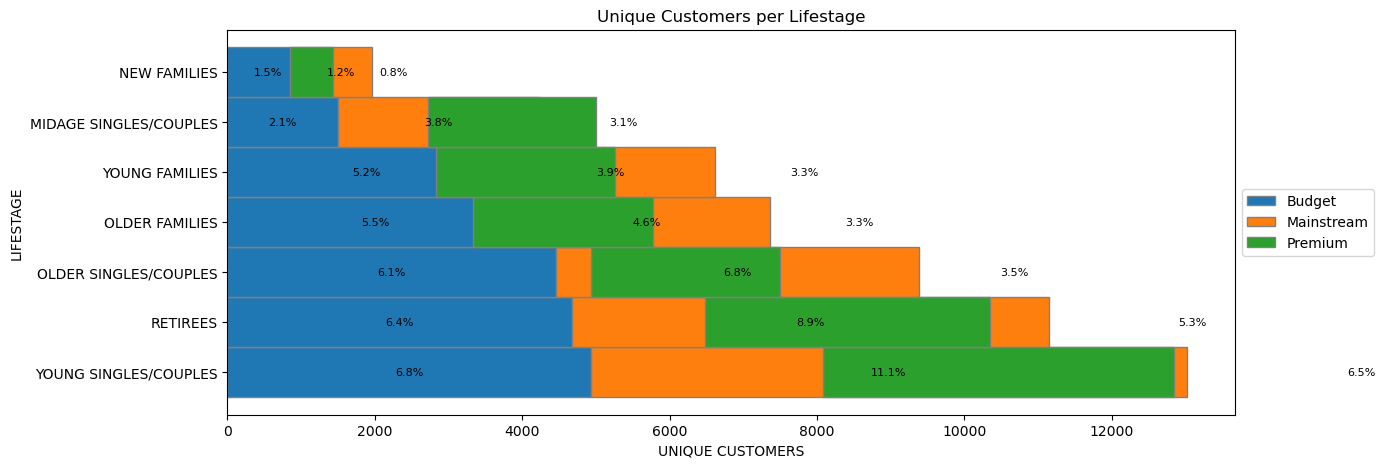

In [123]:
# Values of each group
ncust_bars1 = unique_customer[unique_customer.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]
ncust_bars2 = unique_customer[unique_customer.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]
ncust_bars3 = unique_customer[unique_customer.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]

ncust_bars1_text = (ncust_bars1 / sum(unique_customer)).apply("{:.1%}".format)
ncust_bars2_text = (ncust_bars2 / sum(unique_customer)).apply("{:.1%}".format)
ncust_bars3_text = (ncust_bars3 / sum(unique_customer)).apply("{:.1%}".format)

# Names of group and bar width
names = unique_customer.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(13,5)) 

# Create brown bars
budget_bar = plt.barh(r, ncust_bars1, edgecolor='grey', height=1, label="Budget")
# Create green bars (middle), on top of the first ones
mains_bar = plt.barh(r, ncust_bars2, left=ncust_bars1, edgecolor='grey', height=1, label="Mainstream")
# Create green bars (top)
prem_bar = plt.barh(r, ncust_bars3, left=ncust_bars2, edgecolor='grey', height=1, label="Premium")

for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, ncust_bars1_text[i], va='center', ha='center', size=8)
    plt.text(budget_width + mains_bar[i].get_width()/2, i, ncust_bars2_text[i], va='center', ha='center', size=8)
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, ncust_bars3_text[i], va='center', ha='center', size=8)
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("LIFESTAGE")
plt.xlabel("UNIQUE CUSTOMERS")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.title("Unique Customers per Lifestage")

plt.savefig("lifestage_customers.png", bbox_inches="tight")

# Show graphic
plt.show()

The high sales in the "Young Singles/Couples - Mainstream" and "Retirees - Mainstream" segments are driven by their large number of unique customers. However, the "Older - Budget" segment does not follow this trend. To understand why, we will analyze whether the "Older - Budget" segment has:

1.High Frequency of Purchase

2.High Average Sales per Customer

compared to other segments. This will help identify the factors contributing to its sales performance

In [126]:
# Calculating the frequency of purchases per customer
freq_per_customer = (
    m_data.groupby(["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"])
    .count()["DATE"]
)

# Aggregate the frequency data by lifestage and premium customer segment
freq_summary = (
    freq_per_customer.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])
    .agg(["mean", "count"])
    .sort_values(by = "mean", ascending = False)
)

print(freq_summary)

                                             mean  count
LIFESTAGE              PREMIUM_CUSTOMER                 
OLDER FAMILIES         Mainstream        5.031438   2831
                       Budget            4.954011   4675
                       Premium           4.923009   2273
YOUNG FAMILIES         Budget            4.760269   4017
                       Premium           4.752569   2433
                       Mainstream        4.731305   2728
OLDER SINGLES/COUPLES  Premium           3.737684   4750
                       Budget            3.734429   4929
                       Mainstream        3.715619   4930
MIDAGE SINGLES/COUPLES Mainstream        3.555090   3340
RETIREES               Budget            3.412887   4454
                       Premium           3.382231   3872
MIDAGE SINGLES/COUPLES Premium           3.379679   2431
                       Budget            3.337766   1504
RETIREES               Mainstream        3.313166   6479
NEW FAMILIES           Mainstre

The table provides insights into the average frequency of purchases and the number of unique customers per segment. The "Older Families" lifestage segment stands out as the top contributor to the most frequent purchases.

The "Older - Budget" segment drives high sales due to a combination of:

1. High Frequency of Purchase: Customers in this segment purchase more often.

2. Fairly High Number of Unique Customers: The segment also has a significant number of unique customers.

This combination explains why the "Older - Budget" segment contributes significantly to overall sales.

In [129]:
g_sales.sort_values(ascending=False, by="mean")

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
MIDAGE SINGLES/COUPLES Mainstream         90803.85  7.647284
YOUNG SINGLES/COUPLES  Mainstream        157621.60  7.558339
RETIREES               Premium            97646.05  7.456174
OLDER SINGLES/COUPLES  Premium           132263.15  7.449766
RETIREES               Budget            113147.80  7.443445
OLDER SINGLES/COUPLES  Budget            136769.80  7.430315
NEW FAMILIES           Mainstream         17013.90  7.317806
                       Budget             21928.45  7.297321
YOUNG FAMILIES         Budget            139345.85  7.287201
OLDER SINGLES/COUPLES  Mainstream        133393.80  7.282116
OLDER FAMILIES         Budget            168363.25  7.269570
YOUNG FAMILIES         Premium            84025.50  7.266756
OLDER FAMILIES         Mainstream        103445.55  7.262395
RETIREES               Mainstream        155677.05  7.252262
NEW FAMILIES           Premium            11491.10  7.231655
OLDER FAMILIES         Premium            80658.40  7.208079
YOUNG FAMILIES         Mainstream         92788.75  7.189025
MIDAGE SINGLES/COUPLES Premium            58432.65  7.112056
                       Budget             35514.80  7.074661
YOUNG SINGLES/COUPLES  Premium            41642.10  6.629852
                       Budget             61141.60  6.615624

The Midage and Young "Singles/Couples" segments contribute the highest average spending per purchase. While the difference in spending between their Mainstream and Non-Mainstream groups appears small, further analysis is needed to determine if this difference is statistically significant.

In [132]:
mainstream = m_data["PREMIUM_CUSTOMER"] == "Mainstream"
young_midage = (m_data["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") | (m_data["LIFESTAGE"] == "YOUNG SINGLES/COUPLES")

budget_premium = (m_data["PREMIUM_CUSTOMER"] == "Budget") | (m_data["PREMIUM_CUSTOMER"] == "Premium")

a = m_data[young_midage & mainstream]["TOT_SALES"]
b = m_data[young_midage & budget_premium]["TOT_SALES"]
stat, pval = ttest_ind(a.values, b.values, equal_var=False)

print(pval)
pval < 0.0000001

1.8542040107536954e-281


True

The p-value is extremely close to 0 (1.85e-281), indicating a statistically significant difference in total sales between the "Mainstream Young Midage" segment and the "Budget and Premium Young Midage" segments.

Next, we will analyze which brands of chips the top 3 segments contributing to total sales are purchasing.

In [136]:
m_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["clean_brand_names"].agg(pd.Series.mode).sort_values()

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              Kettle
YOUNG FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
RETIREES                Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
OLDER SINGLES/COUPLES   Premium             Kettle
YOUNG SINGLES/COUPLES   Mainstream          Kettle
OLDER SINGLES/COUPLES   Mainstream          Kettle
OLDER FAMILIES          Mainstream          Kettle
                        Budget              Kettle
NEW FAMILIES            Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
MIDAGE SINGLES/COUPLES  Premium             Kettle
                        Mainstream          Kettle
OLDER SINGLES/COUPLES   Budget              Kettle
YOUNG SINGLES/COUPLES   Premium          

========== MIDAGE SINGLES/COUPLES - Budget ==========
clean_brand_names
Kettle     713
Smiths     633
Doritos    533
Name: count, dtype: int64


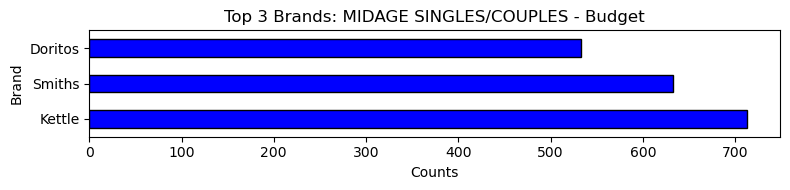

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
clean_brand_names
Kettle     2136
Smiths     1337
Doritos    1291
Name: count, dtype: int64


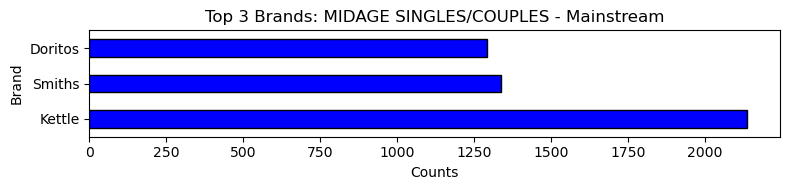

========== MIDAGE SINGLES/COUPLES - Premium ==========
clean_brand_names
Kettle     1206
Smiths      986
Doritos     837
Name: count, dtype: int64


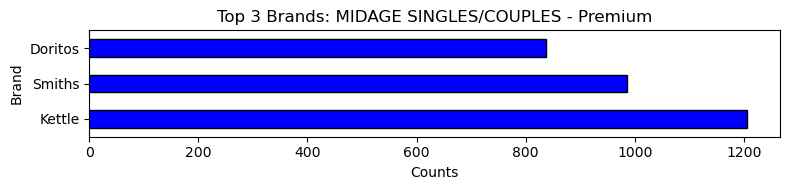

========== NEW FAMILIES - Budget ==========
clean_brand_names
Kettle     510
Doritos    343
Smiths     341
Name: count, dtype: int64


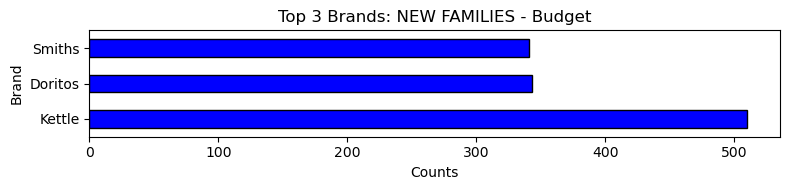

========== NEW FAMILIES - Mainstream ==========
clean_brand_names
Kettle     414
Doritos    274
Smiths     254
Name: count, dtype: int64


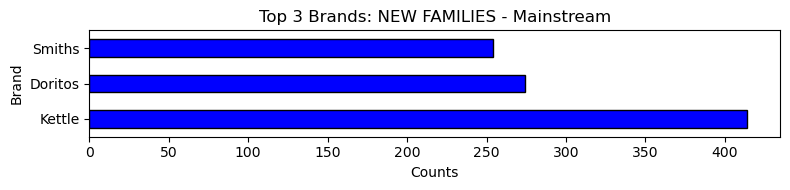

========== NEW FAMILIES - Premium ==========
clean_brand_names
Kettle      247
Doritos     167
Pringles    165
Name: count, dtype: int64


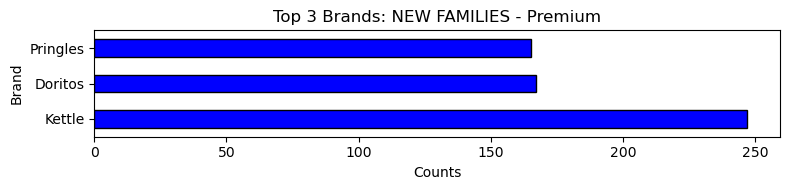

========== OLDER FAMILIES - Budget ==========
clean_brand_names
Kettle     3320
Smiths     3093
Doritos    2351
Name: count, dtype: int64


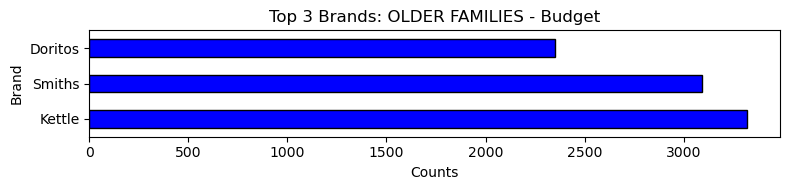

========== OLDER FAMILIES - Mainstream ==========
clean_brand_names
Kettle     2019
Smiths     1835
Doritos    1449
Name: count, dtype: int64


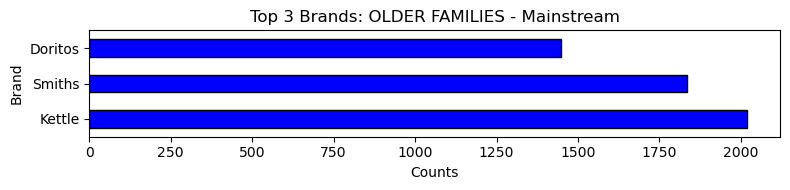

========== OLDER FAMILIES - Premium ==========
clean_brand_names
Smiths     1515
Kettle     1512
Doritos    1065
Name: count, dtype: int64


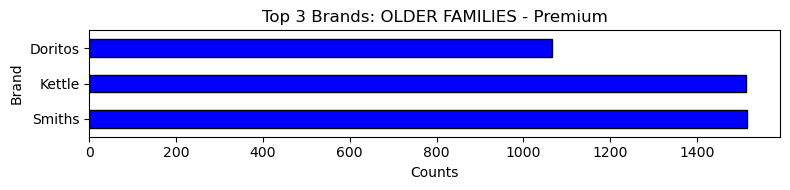

========== OLDER SINGLES/COUPLES - Budget ==========
clean_brand_names
Kettle     3065
Smiths     2098
Doritos    1954
Name: count, dtype: int64


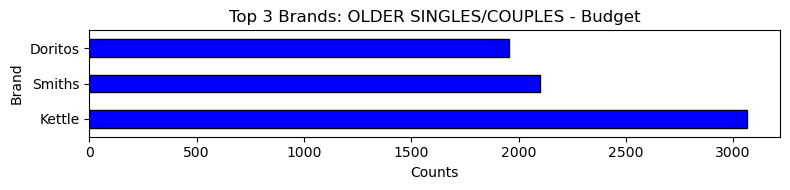

========== OLDER SINGLES/COUPLES - Mainstream ==========
clean_brand_names
Kettle     2835
Smiths     2180
Doritos    2008
Name: count, dtype: int64


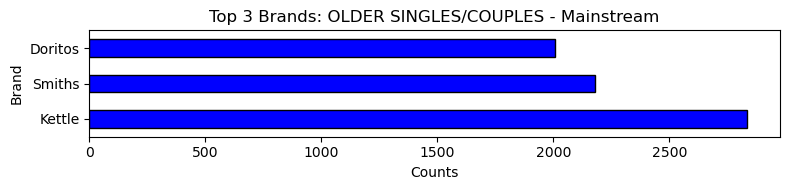

========== OLDER SINGLES/COUPLES - Premium ==========
clean_brand_names
Kettle     2947
Smiths     2042
Doritos    1958
Name: count, dtype: int64


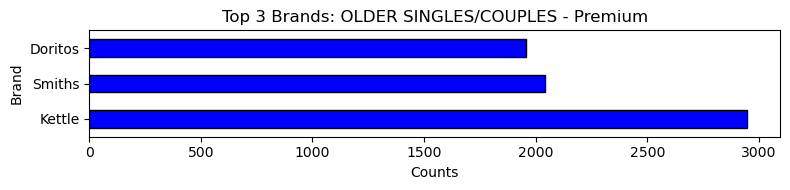

========== RETIREES - Budget ==========
clean_brand_names
Kettle     2592
Doritos    1742
Smiths     1679
Name: count, dtype: int64


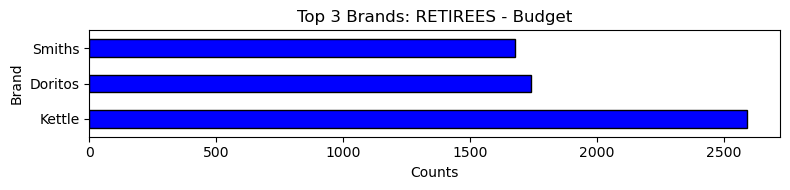

========== RETIREES - Mainstream ==========
clean_brand_names
Kettle     3386
Smiths     2476
Doritos    2320
Name: count, dtype: int64


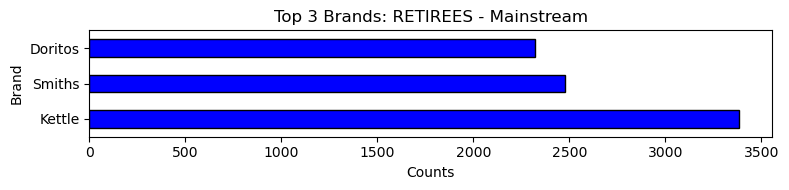

========== RETIREES - Premium ==========
clean_brand_names
Kettle     2216
Smiths     1458
Doritos    1409
Name: count, dtype: int64


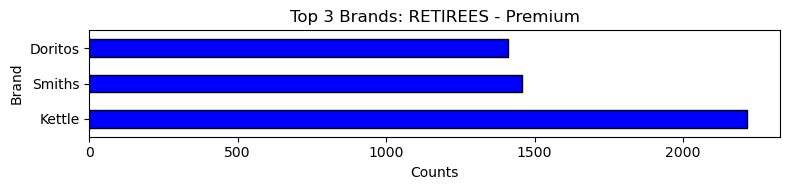

========== YOUNG FAMILIES - Budget ==========
clean_brand_names
Kettle     2743
Smiths     2459
Doritos    1996
Name: count, dtype: int64


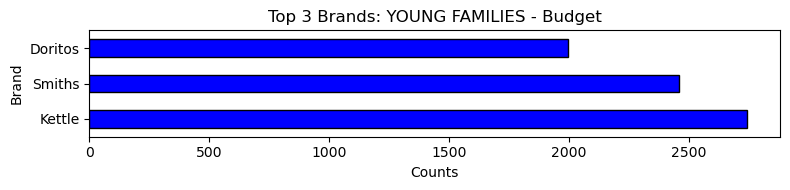

========== YOUNG FAMILIES - Mainstream ==========
clean_brand_names
Kettle     1789
Smiths     1772
Doritos    1309
Name: count, dtype: int64


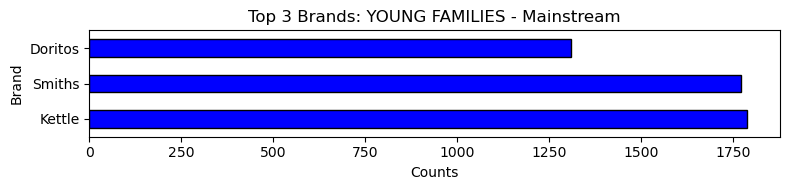

========== YOUNG FAMILIES - Premium ==========
clean_brand_names
Kettle     1745
Smiths     1442
Doritos    1129
Name: count, dtype: int64


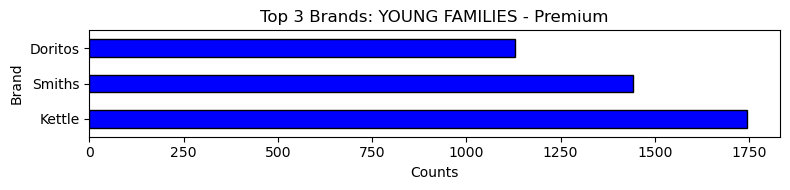

========== YOUNG SINGLES/COUPLES - Budget ==========
clean_brand_names
Smiths     1245
Kettle     1211
Doritos     899
Name: count, dtype: int64


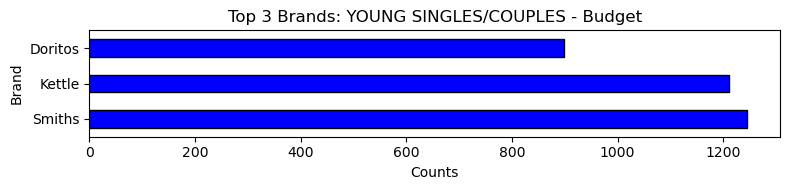

========== YOUNG SINGLES/COUPLES - Mainstream ==========
clean_brand_names
Kettle      3844
Doritos     2541
Pringles    2315
Name: count, dtype: int64


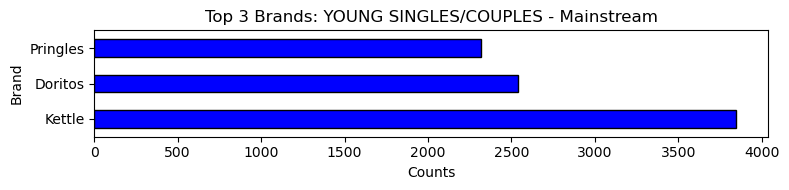

========== YOUNG SINGLES/COUPLES - Premium ==========
clean_brand_names
Kettle     838
Smiths     826
Doritos    570
Name: count, dtype: int64


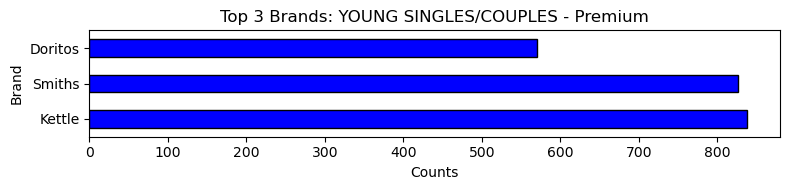

In [138]:
# Loop through each unique combination of LIFESTAGE and PREMIUM_CUSTOMER
for (stage, prem), group in m_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]):
    # Print the header for each combination
    print(f'========== {stage} - {prem} ==========')
    
    # Get the top 3 most common brand names in the group
    top_brands = group["clean_brand_names"].value_counts().head(3)
    print(top_brands)
    
    # Plot the top 3 brand names in a horizontal bar chart
    top_brands.plot.barh(figsize=(8, 2), color='blue', edgecolor='black')
    
  
    plt.title(f'Top 3 Brands: {stage} - {prem}')
    plt.xlabel('Counts')
    plt.ylabel('Brand')
    

    plt.tight_layout()  
    plt.show()


From the graps above we can see that almost all the segments have Kettle as their choice of chips.

for better understanding of this trend we will apply priority analysis to analyze the trend from the purchasing patter of all the segments.

In [165]:
temp = m_data.reset_index().rename(columns = {"index": "transaction"})
temp["Segment"] = temp["LIFESTAGE"] + ' - ' + temp['PREMIUM_CUSTOMER']
segment_brand_encode = pd.concat([pd.get_dummies(temp["Segment"]), pd.get_dummies(temp["clean_brand_names"])], axis=1)

frequent_sets = apriori(segment_brand_encode, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_sets, num_itemsets=(m_data), metric="lift", min_threshold=1)

set_temp = temp["Segment"].unique()
rules[rules["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in set_temp)]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(OLDER FAMILIES - Budget),(Smiths),0.087451,0.120162,0.011679,0.133549,1.111409,1.0,0.001171,1.015451,0.109848,0.059607,0.015215,0.115372
3,(OLDER SINGLES/COUPLES - Budget),(Kettle),0.069504,0.155901,0.011573,0.166513,1.068064,1.0,0.000738,1.012731,0.068487,0.054123,0.012571,0.120374
4,(OLDER SINGLES/COUPLES - Premium),(Kettle),0.067038,0.155901,0.011128,0.165991,1.064716,1.0,0.000676,1.012097,0.065150,0.052536,0.011953,0.118684
6,(RETIREES - Mainstream),(Kettle),0.081055,0.155901,0.012785,0.157738,1.011779,1.0,0.000149,1.002180,0.012669,0.057034,0.002176,0.119874
8,(YOUNG SINGLES/COUPLES - Mainstream),(Kettle),0.078744,0.155901,0.014515,0.184329,1.182344,1.0,0.002239,1.034852,0.167405,0.065937,0.033678,0.138716


The a-priori analysis reveals that Kettle is the most preferred brand across multiple customer segments, including:

- Older Singles/Couples - Budget

- Older Singles/Couples - Premium

- Retirees - Mainstream

- Young Singles/Couples - Mainstream

The lift values indicate strong associations, particularly for Young Singles/Couples - Mainstream (lift = 1.18), suggesting a significant preference for Kettle in this segment. Overall, Kettle stands out as the top brand choice for most segments.

Next, we will analyze the pack size preferences of different customer segments to understand their buying behavior.

---------- YOUNG SINGLES/COUPLES - Premium ----------

Pack_Size
175g    1587
150g     961
134g     537
Name: count, dtype: int64


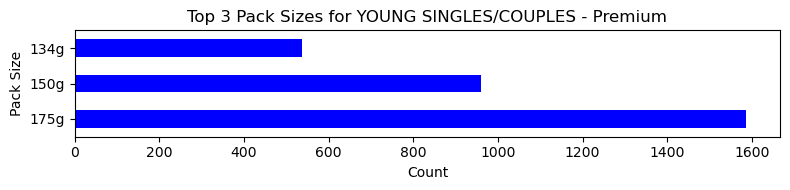

---------- YOUNG SINGLES/COUPLES - Budget ----------

Pack_Size
175g    2262
150g    1439
134g     832
Name: count, dtype: int64


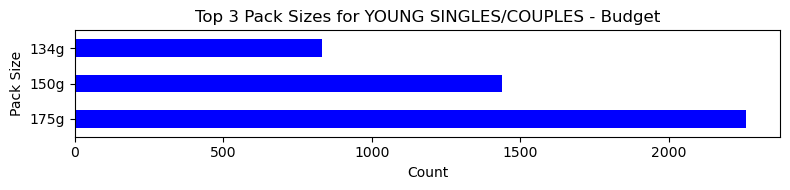

---------- YOUNG SINGLES/COUPLES - Mainstream ----------

Pack_Size
175g    4928
150g    3159
134g    2315
Name: count, dtype: int64


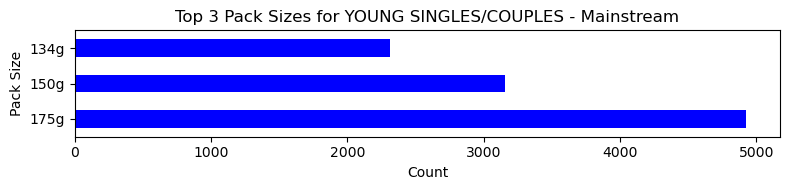

---------- MIDAGE SINGLES/COUPLES - Premium ----------

Pack_Size
175g    2034
150g    1285
134g     781
Name: count, dtype: int64


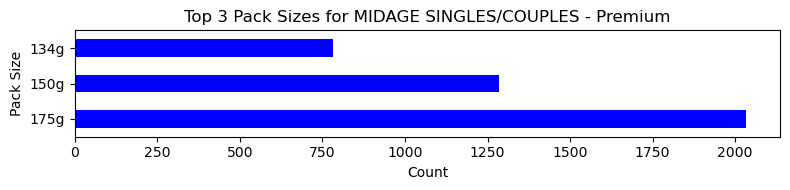

---------- MIDAGE SINGLES/COUPLES - Budget ----------

Pack_Size
175g    1256
150g     821
134g     449
Name: count, dtype: int64


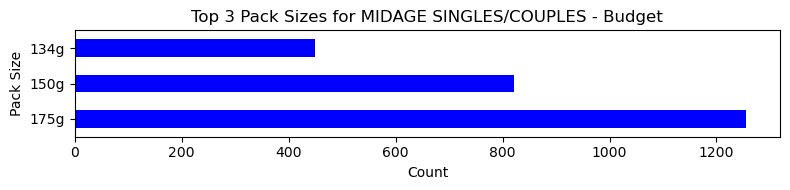

---------- MIDAGE SINGLES/COUPLES - Mainstream ----------

Pack_Size
175g    2912
150g    1819
134g    1159
Name: count, dtype: int64


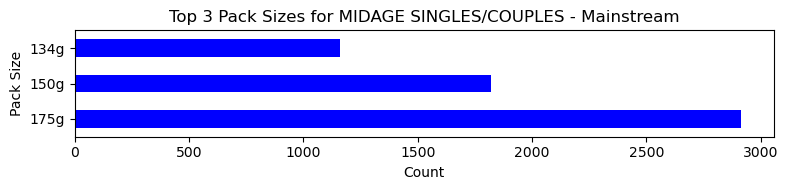

---------- NEW FAMILIES - Premium ----------

Pack_Size
175g    371
150g    245
134g    165
Name: count, dtype: int64


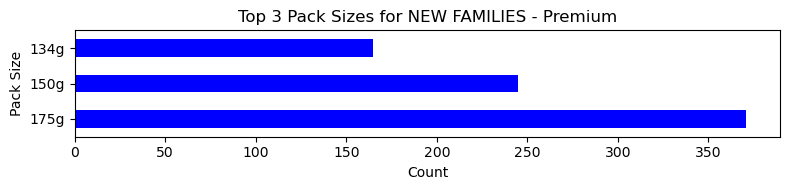

---------- NEW FAMILIES - Budget ----------

Pack_Size
175g    763
150g    448
134g    309
Name: count, dtype: int64


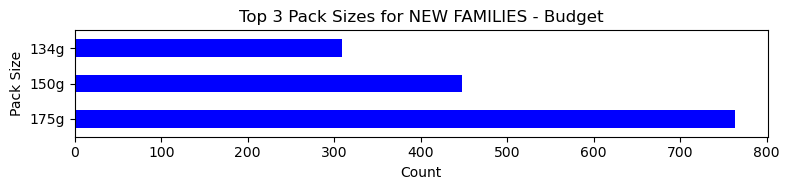

---------- NEW FAMILIES - Mainstream ----------

Pack_Size
175g    579
150g    384
134g    224
Name: count, dtype: int64


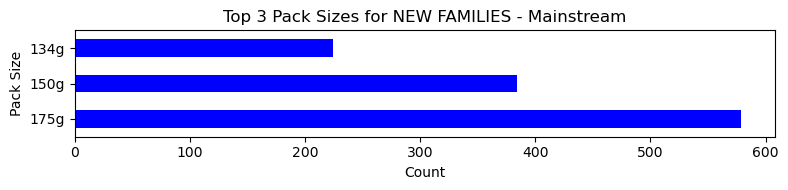

---------- OLDER FAMILIES - Premium ----------

Pack_Size
175g    2747
150g    1750
134g    1014
Name: count, dtype: int64


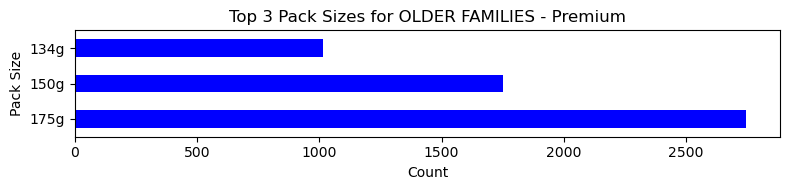

---------- OLDER FAMILIES - Budget ----------

Pack_Size
175g    5662
150g    3708
134g    1996
Name: count, dtype: int64


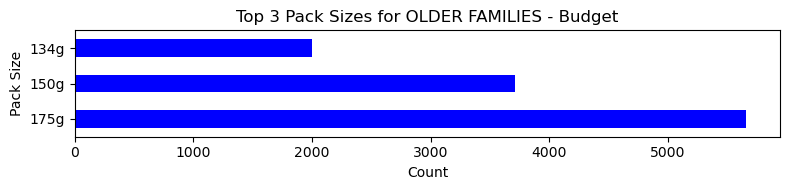

---------- OLDER FAMILIES - Mainstream ----------

Pack_Size
175g    3489
150g    2261
134g    1234
Name: count, dtype: int64


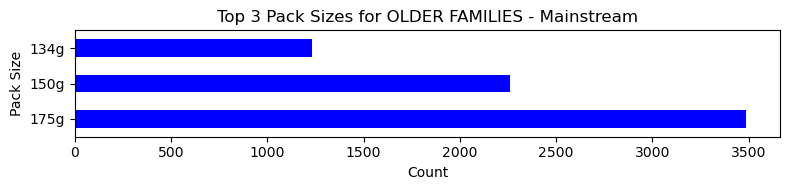

---------- OLDER SINGLES/COUPLES - Premium ----------

Pack_Size
175g    4382
150g    2854
134g    1744
Name: count, dtype: int64


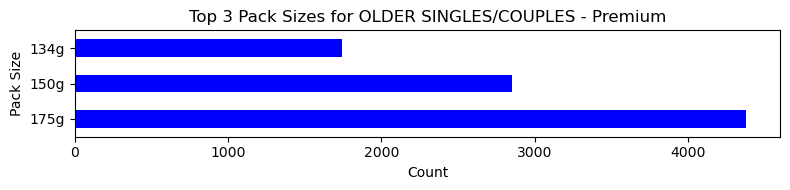

---------- OLDER SINGLES/COUPLES - Budget ----------

Pack_Size
175g    4535
150g    2899
134g    1843
Name: count, dtype: int64


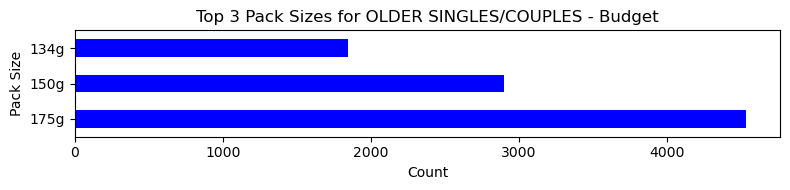

---------- OLDER SINGLES/COUPLES - Mainstream ----------

Pack_Size
175g    4422
150g    2875
134g    1720
Name: count, dtype: int64


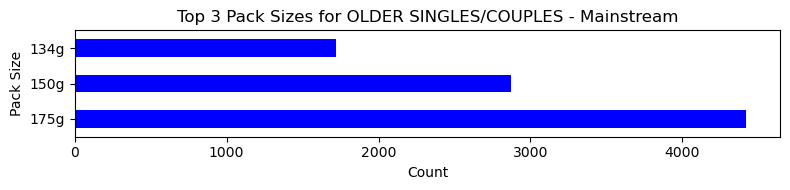

---------- RETIREES - Premium ----------

Pack_Size
175g    3232
150g    2015
134g    1331
Name: count, dtype: int64


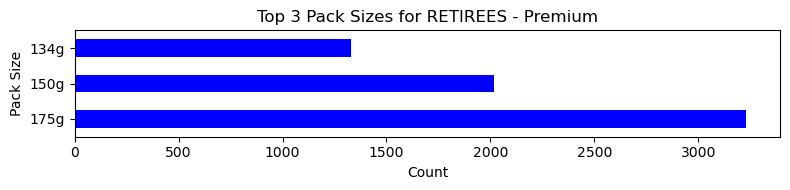

---------- RETIREES - Budget ----------

Pack_Size
175g    3768
150g    2381
134g    1517
Name: count, dtype: int64


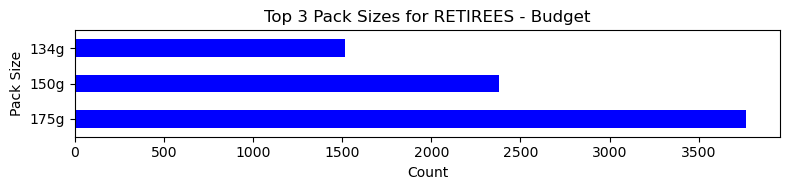

---------- RETIREES - Mainstream ----------

Pack_Size
175g    5187
150g    3415
134g    2103
Name: count, dtype: int64


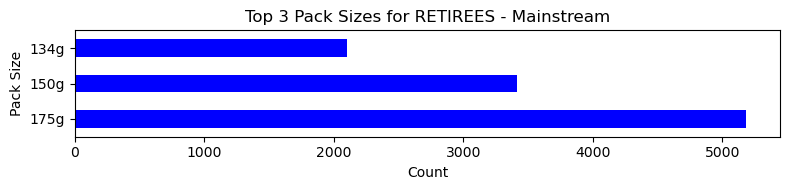

---------- YOUNG FAMILIES - Premium ----------

Pack_Size
175g    2926
150g    1832
134g    1007
Name: count, dtype: int64


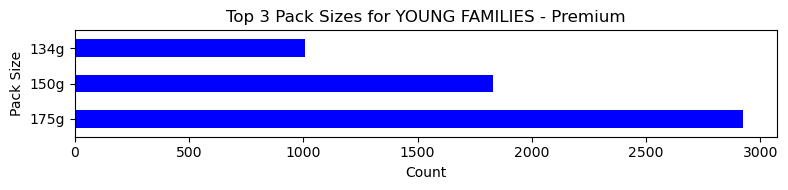

---------- YOUNG FAMILIES - Budget ----------

Pack_Size
175g    4800
150g    2981
134g    1674
Name: count, dtype: int64


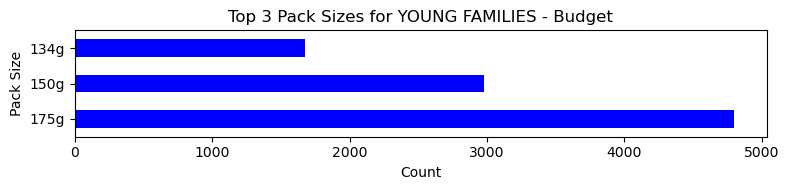

---------- YOUNG FAMILIES - Mainstream ----------

Pack_Size
175g    3087
150g    2101
134g    1148
Name: count, dtype: int64


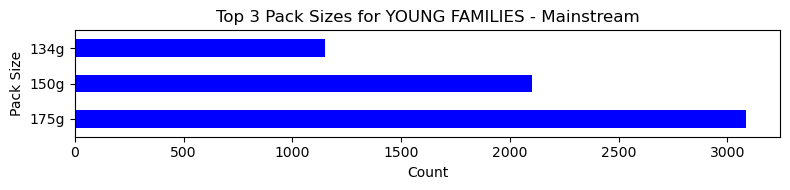

In [175]:
# Extract 'Pack_Size' from the 'PROD_NAME' column, assuming sizes are numbers followed by 'g' (grams)
pack_sizes = m_data["PROD_NAME"].str.extract(r'(\d+g)', expand=False)

# Add 'Pack_Size' column to m_data DataFrame
merged_pack = pd.concat([m_data, pack_sizes.rename("Pack_Size")], axis=1)

# Loop through unique combinations of 'LIFESTAGE' and 'PREMIUM_CUSTOMER'
for stage in m_data["LIFESTAGE"].unique():
    for prem in m_data["PREMIUM_CUSTOMER"].unique():
        print(f"---------- {stage} - {prem} ----------\n")

        # Filter data for the current LIFESTAGE and PREMIUM_CUSTOMER, and get top 3 Pack_Sizes
        summary = (merged_pack[(merged_pack["LIFESTAGE"] == stage) &
                               (merged_pack["PREMIUM_CUSTOMER"] == prem)]["Pack_Size"]
                   .value_counts()
                   .head(3))

        # Print the summary
        print(summary)

        # Plot the summary as a bar chart
        plt.figure(figsize=(8, 2))
        summary.plot(kind="barh", color='blue')
        plt.xlabel("Count")
        plt.ylabel("Pack Size")
        plt.title(f"Top 3 Pack Sizes for {stage} - {prem}")
        plt.tight_layout()
        plt.show()


In [177]:
# Calculate average pack size purchased per customer for each segment
average_pack_size = (
    temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])
    .apply(lambda x: x["PROD_QTY"].sum() / x["LYLTY_CARD_NBR"].nunique())
    .sort_values(ascending=False)
)

# Display the results
print(average_pack_size)

LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Mainstream          9.804309
                        Budget              9.639572
                        Premium             9.578091
YOUNG FAMILIES          Budget              9.238486
                        Premium             9.209207
                        Mainstream          9.180352
OLDER SINGLES/COUPLES   Premium             7.154947
                        Budget              7.145466
                        Mainstream          7.098783
MIDAGE SINGLES/COUPLES  Mainstream          6.796108
RETIREES                Budget              6.458015
                        Premium             6.426653
MIDAGE SINGLES/COUPLES  Premium             6.386672
                        Budget              6.313830
RETIREES                Mainstream          6.253743
NEW FAMILIES            Mainstream          5.087161
                        Premium             5.028912
                        Budget              5.009892
YOUNG

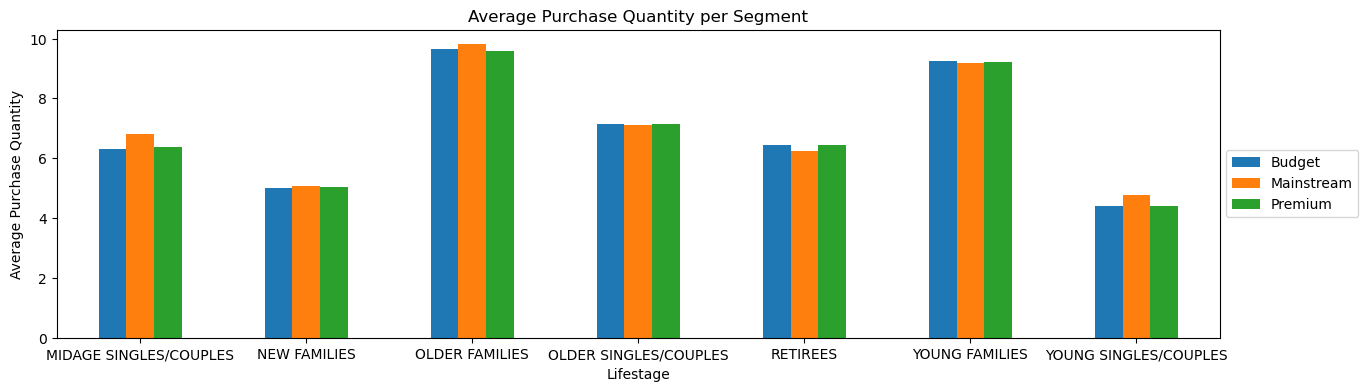

In [185]:
# Calculate average purchase quantity per customer for each segment
average_purchase_quantity = (
    temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum() / 
    temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique()
)

# Unstack the data for better visualization and plot as a bar chart
average_purchase_quantity.unstack().plot.bar(figsize=(15, 4), rot=0)

# Customize the plot
plt.title("Average Purchase Quantity per Segment")
plt.xlabel("Lifestage")
plt.ylabel("Average Purchase Quantity")
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

# Save the plot
plt.savefig("Average_purchase_quantity_per_segment.png", bbox_inches="tight")

# Display the plot
plt.show()

In [187]:
# Calculate the unit price per transaction
temp["Unit_Price"] = temp["TOT_SALES"] / temp["PROD_QTY"]

# Calculate the average chips price per transaction by segment
average_price_per_segment = (
    temp.groupby("Segment")["Unit_Price"]
    .mean()
    .sort_values(ascending=False)
)

# Print the results
print("\n----- Average chips price per transaction by segments -----\n")
print(average_price_per_segment)


----- Average chips price per transaction by segments -----

Segment
YOUNG SINGLES/COUPLES - Mainstream     4.071485
MIDAGE SINGLES/COUPLES - Mainstream    4.000101
RETIREES - Budget                      3.924883
RETIREES - Premium                     3.921323
NEW FAMILIES - Budget                  3.919251
NEW FAMILIES - Mainstream              3.916581
OLDER SINGLES/COUPLES - Premium        3.887220
OLDER SINGLES/COUPLES - Budget         3.877022
NEW FAMILIES - Premium                 3.871743
RETIREES - Mainstream                  3.833343
OLDER SINGLES/COUPLES - Mainstream     3.803800
YOUNG FAMILIES - Budget                3.753659
MIDAGE SINGLES/COUPLES - Premium       3.752915
YOUNG FAMILIES - Premium               3.752402
OLDER FAMILIES - Budget                3.733344
MIDAGE SINGLES/COUPLES - Budget        3.728496
OLDER FAMILIES - Mainstream            3.727383
YOUNG FAMILIES - Mainstream            3.707097
OLDER FAMILIES - Premium               3.704625
YOUNG SINGLES/COUP

In [2]:
# Plot the average unit price per segment
average_price_per_segment.plot(kind="bar", figsize=(15, 6), rot=45)
plt.title("Average Chips Price per Transaction by Segment")
plt.xlabel("Segment")
plt.ylabel("Average Unit Price")
plt.tight_layout()

# Save the plot
plt.savefig("Average_chips_price_per_segment.png", bbox_inches="tight")

# Display the plot
plt.show()

NameError: name 'average_price_per_segment' is not defined

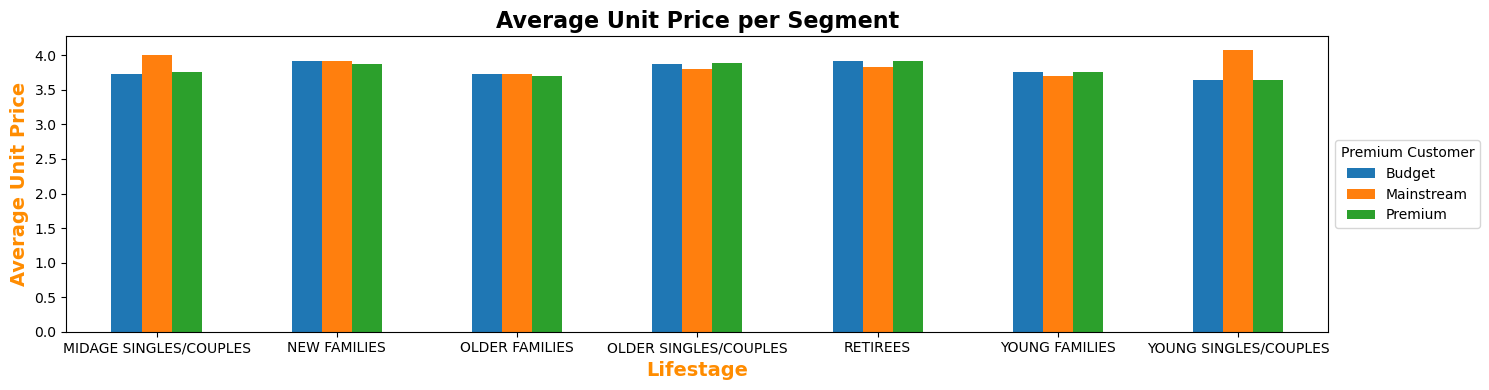

In [199]:
# Ensure the Unit_Price column is numeric
temp["Unit_Price"] = pd.to_numeric(temp["Unit_Price"], errors="coerce")

# Calculate the average unit price per segment
average_unit_price = (
    temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])
    .mean(numeric_only=True)["Unit_Price"]  # Use numeric_only=True to avoid errors
    .unstack()
)

# Plot the average unit price as a bar chart
average_unit_price.plot.bar(figsize=(15, 4), rot=0)

# Customize the plot
plt.title("Average Unit Price per Segment", fontsize=16, fontweight='bold')
plt.xlabel("Lifestage", fontsize=14, fontweight='bold', color='darkorange')
plt.ylabel("Average Unit Price", fontsize=14, fontweight='bold', color='darkorange')
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Premium Customer")

# Display the plot
plt.tight_layout()
plt.show()

In [217]:
# Group by 'Segment' and 'clean_brand_names', sum only the 'TOT_SALES' column, and sort in descending order
z = (
    temp.groupby(["Segment", "clean_brand_names"], as_index=False)["TOT_SALES"]
    .sum()
    .sort_values(by="TOT_SALES", ascending=False)
)

# Filter the results for the segment "YOUNG SINGLES/COUPLES - Mainstream"
young_singles_couples_mainstream = z[z["Segment"] == "YOUNG SINGLES/COUPLES - Mainstream"]
young_singles_couples_mainstream

,Segment,clean_brand_names,TOT_SALES
504,YOUNG SINGLES/COUPLES - Mainstream,Kettle,35423.6
499,YOUNG SINGLES/COUPLES - Mainstream,Doritos,21705.9
508,YOUNG SINGLES/COUPLES - Mainstream,Pringles,16006.2
511,YOUNG SINGLES/COUPLES - Mainstream,Smiths,15265.7
503,YOUNG SINGLES/COUPLES - Mainstream,Infuzions,8749.4
507,YOUNG SINGLES/COUPLES - Mainstream,Old,8180.4
516,YOUNG SINGLES/COUPLES - Mainstream,Twisties,7539.8
515,YOUNG SINGLES/COUPLES - Mainstream,Tostitos,7238.0
514,YOUNG SINGLES/COUPLES - Mainstream,Thins,7217.1
498,YOUNG SINGLES/COUPLES - Mainstream,Cobs,6144.6


Key Trends and Insights
Top 3 Segments by Total Sales:

- Older Families (Budget): $168,364 (highest sales despite lower population, driven by high purchase frequency).

- Young Singles/Couples (Mainstream): $157,622 (largest population, contributing to high sales).

- Retirees (Mainstream): $155,667 (second-largest population, driving significant sales).

Purchase Behavior:

- Older Families: Highest purchase frequency and average quantity of chips per purchase.

- Young Families: Second-highest average quantity of chips per purchase.

- Mainstream Young and Midage Singles/Couples: Highest spending per purchase, significantly higher than non-Mainstream counterparts.

Brand Preferences:

- Kettle: Dominates as the most purchased brand across all segments.

- Doritos: Preferred by Young and Midage Singles/Couples as their second choice, unlike other segments that favor Smiths.

Chip Size Preferences:

- 175g: Most frequently purchased size across all segments.

- 150g: Second most popular size.

Summary:
- Sales Drivers: Population size, purchase frequency, and spending per purchase significantly influence total sales.

- Brand Dominance: Kettle leads across all segments, with Doritos being a unique preference for Young and Midage Singles/Couples.

- Chip Size: Larger sizes (175g and 150g) are the most popular.

Views and Recommendations
1. Older Families (Budget Segment):

- Strengths: High purchase frequency and large quantity of chips bought per visit.

- Recommendations:

 - Offer promotions to encourage even higher purchase frequency.

 - Introduce incentives to increase the quantity of chips purchased per transaction.

2. Young Singles/Couples (Mainstream Segment):

- Strengths: Largest population size and unique preference for Doritos as their second most-purchased brand.

- Recommendations:

 - Collaborate with Doritos to create targeted branding promotions for this segment.

 - Ensure promotions are widely distributed and frequent to leverage their population size.

3. Retirees (Mainstream Segment):

- Strengths: Significant population size driving high total sales.

- Recommendations:

 - Focus on widespread and frequent promotional campaigns to maximize reach within this segment.

4. General Recommendations:

- Kettle Brand: Capitalize on its dominance as the most purchased brand across all segments.

- Chip Sizes: Promote the most popular sizes (175g and 150g) in all campaigns.

- Cross-Segment Strategy: Use these universal preferences (Kettle and preferred chip sizes) to design promotions that appeal to all segments.

Summary:
- Targeted Promotions: Tailor strategies to the unique strengths and preferences of each segment.

- Universal Appeal: Leverage the popularity of Kettle and preferred chip sizes (175g and 150g) for broader campaigns.

- Collaborations: Partner with Doritos to specifically target the Young Singles/Couples (Mainstream) segment.